In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/shyam/Downloads/Data12.csv', parse_dates=[0])

In [3]:
df.head()

,TIME,Sales,Inflation
0,2007-09-01,95.52058,2.414328
1,2007-10-01,95.37652,2.968873
2,2007-11-01,95.53848,3.513978
3,2007-12-01,94.97173,3.455396
4,2008-01-01,95.21674,3.622073


In [4]:
df.set_index('TIME',inplace=True)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

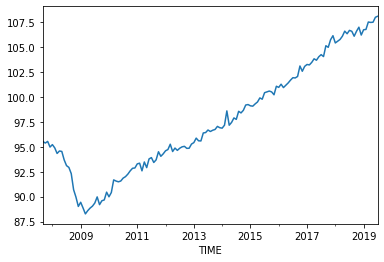

In [6]:
df['Sales'].plot()

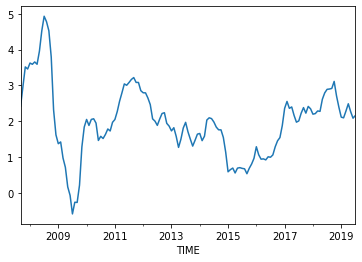

In [7]:
df['Inflation'].plot()

In [8]:
df.describe()

,Sales,Inflation
count,143.000000,143.000000
mean,97.654377,1.983359
std,5.522014,0.986531
min,88.261600,-0.589731
25%,93.579705,1.453629
50%,96.659110,2.000485
75%,101.920500,2.438811
max,108.102000,4.928719


In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(df['Sales'])

ADF Test Statistic : 0.13623150056228794
p-value : 0.9684494830598742
#Lags Used : 5
Number of Observations Used : 137
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
adfuller_test(df['Inflation'])

ADF Test Statistic : -2.9890436351701575
p-value : 0.0359303327020944
#Lags Used : 13
Number of Observations Used : 129
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
sd_result=seasonal_decompose(df['Sales'], model='Additive')

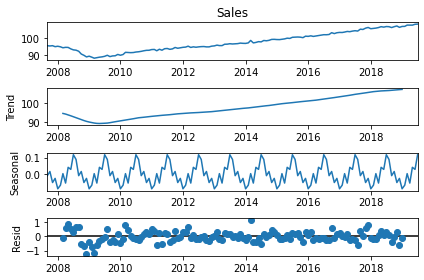

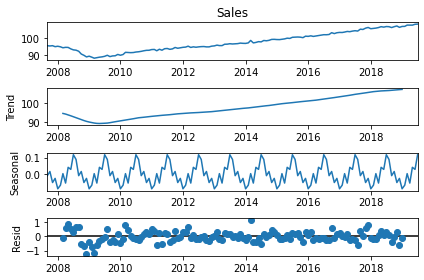

In [17]:
sd_result.plot()

In [18]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [19]:
df[' Sales Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [21]:
adfuller_test(df[' Sales Seasonal First Difference'].dropna())

ADF Test Statistic : -4.783584858220599
p-value : 5.8457779961636245e-05
#Lags Used : 13
Number of Observations Used : 117
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

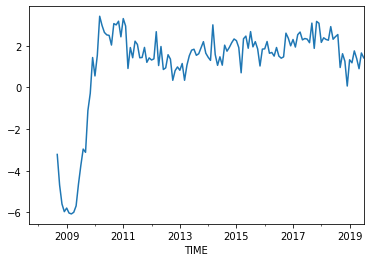

In [23]:
df[' Sales Seasonal First Difference'].plot()

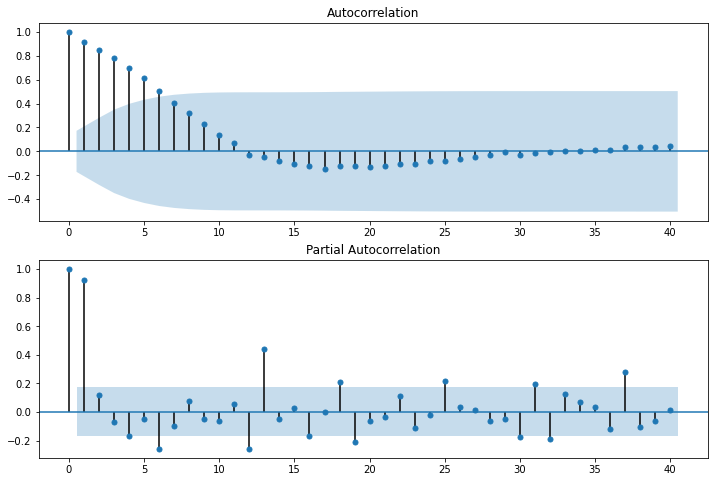

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df[' Sales Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df[' Sales Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [27]:
import statsmodels.api as sm

In [39]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12), exog=df['Inflation'])
results=model.fit()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                               SARIMAX Results                                                
==============================================================================================================
Dep. Variable:                                                  Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2, 3, 4, 5, 6, 7], 12)   Log Likelihood                 -99.434
Date:                                                Mon, 19 Sep 2022   AIC                            222.868
Time:                                                        16:04:44   BIC                            257.278
Sample:                                                    09-01-2007   HQIC                           236.850
                                                         - 07-01-2019                                         
Covariance Type:                                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Inflation      0.2756      0.112      2.466      0.014       0.057       0.495
ar.L1         -0.2955      0.444     -0.666      0.506      -1.165       0.574
ma.L1          0.0989      0.460      0.215      0.830      -0.804       1.001
ar.S.L12      -0.5976      1.229     -0.486      0.627      -3.007       1.812
ma.S.L12      -0.3206      1.202     -0.267      0.790      -2.677       2.036
ma.S.L24      -0.4348      1.185     -0.367      0.714      -2.757       1.887
ma.S.L36      -0.1138      0.190     -0.600      0.549      -0.486       0.258
ma.S.L48       0.2108      0.296      0.713      0.476      -0.369       0.790
ma.S.L60       0.1412      0.401      0.352      0.725      -0.644       0.926
ma.S.L72      -0.2318      0.224     -1.035      0.301      -0.671       0.207
ma.S.L84       0.0326      0.364      0.090      0.929      -0.682       0.747
sigma2         0.2326      0.038      6.120      0.000       0.158       0.307
===================================================================================
Ljung-Box (Q):                       37.59   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.58   Prob(JB):                         0.42
Heteroskedasticity (H):               0.41   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
model_1=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12), exog=df['Inflation'])
results_1=model_1.fit()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [31]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -101.757
Date:                            Mon, 19 Sep 2022   AIC                            215.513
Time:                                    16:06:07   BIC                            232.718
Sample:                                09-01-2007   HQIC                           222.504
                                     - 07-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Inflation      0.3414      0.110      3.099      0.002       0.126       0.557
ar.L1         -0.2746      0.408     -0.673      0.501      -1.074       0.525
ma.L1          0.0601      0.417      0.144      0.885      -0.757       0.877
ar.S.L12      -0.1426      0.115     -1.245      0.213      -0.367       0.082
ma.S.L12      -0.8054      0.130     -6.189      0.000      -1.060      -0.550
sigma2         0.2489      0.029      8.598      0.000       0.192       0.306
===================================================================================
Ljung-Box (Q):                       41.76   Jarque-Bera (JB):                 6.28
Prob(Q):                              0.39   Prob(JB):                         0.04
Heteroskedasticity (H):               0.39   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
model_2=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results_2=model_2.fit()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [33]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -105.139
Date:                            Mon, 19 Sep 2022   AIC                            220.278
Time:                                    16:07:01   BIC                            234.616
Sample:                                09-01-2007   HQIC                           226.104
                                     - 07-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2829      0.477     -0.593      0.553      -1.218       0.652
ma.L1          0.1210      0.490      0.247      0.805      -0.839       1.081
ar.S.L12      -0.1335      0.112     -1.186      0.235      -0.354       0.087
ma.S.L12      -0.8340      0.133     -6.255      0.000      -1.095      -0.573
sigma2         0.2592      0.031      8.284      0.000       0.198       0.321
===================================================================================
Ljung-Box (Q):                       36.09   Jarque-Bera (JB):                 6.24
Prob(Q):                              0.65   Prob(JB):                         0.04
Heteroskedasticity (H):               0.41   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

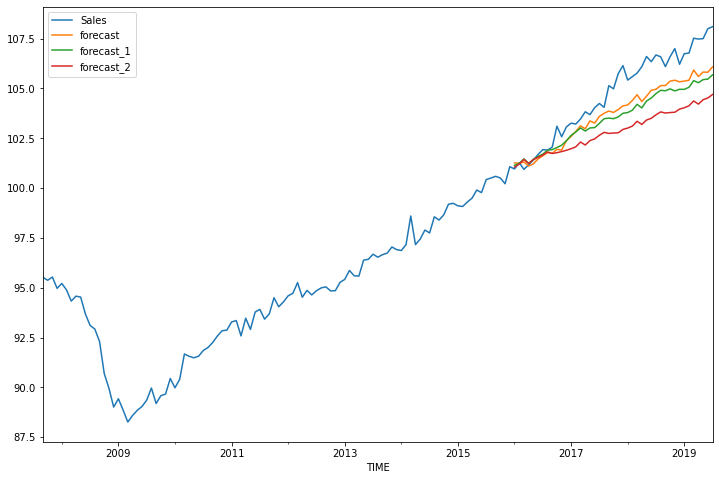

In [38]:
df['forecast']=results.predict(start=100,end=142,dynamic=True)
df['forecast_1']=results_1.predict(start=100,end=142,dynamic=True)
df['forecast_2']=results_2.predict(start=100,end=142,dynamic=True)
df[['Sales','forecast','forecast_1','forecast_2']].plot(figsize=(12,8))